<b><u>Integer Wavelet Transform</u></b>

<b>Wavelet Transform</b> is a transform domain signal processing technique where any signal can be analysed into its average and detail sub-bands.
To do this we need two function

	1) Scaling Function
	2) Wavelet Function

* Continuous Signal(CWT)
	* MexicanHat
* Discrete Signal(DWT)
	* Haar
	* Morlet
	* Daubeches



<b>1) Fourier transform(FT/FFT) :</b> It locates either time or frequency domain, not both of them simultaniously

<b>2) Short Fourier Transformation(SFT)</b>

<b>3) Wavelet transform(Time and Frequency localization)</b>

* <b>Integer Wavelet Transfer :</b> All coefficients are integers

    * Work Faster
    * Low chances of Error

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Reading an image

In [3]:
img=cv2.imread("lena.tiff",0)
# img=np.array([[191,187,206,198],
#     [171,151,186,186],
#     [130,106,116,168],
#     [112,120,136,140]])
(row,col)=img.shape
img=img.astype('int32')


Forward Transform

$a[n]=\frac{\mathrm{x[2n]+x[2n+1]}}{2}$

$d[n]=x[2n]-x[2n+1]$


* Apply previous 2 formulas to each row of the image matrix of size(MxN).
* Apply previous 2 formulas to each column of the matrix found from step 1.
* Devide the resulting matrix in 4 equal halves - LL, LH, HL, HH.

In [4]:
def forward_wavelet_transform(img,row,col):
    img_col=img.copy()
    img_row=np.zeros((row,col),dtype='int32')
    # img_col=np.zeros((row,col),dtype='int32')
    for i in range(row):
        for j in range(col//2):
            img_row[i][j]=math.floor((img_col[i][2*j]+img_col[i][2*j+1])/2)
            img_row[i][j+(col//2)]=img_col[i][2*j]-img_col[i][2*j+1]
    for j in range(col):
        for i in range(row//2):
            img_col[i][j]=math.floor((img_row[2*i][j]+img_row[2*i+1][j])/2)
            img_col[i+row//2][j]=img_row[2*i][j]-img_row[2*i+1][j]
    LL=img_col[0:row//2,0:col//2].copy()
    LH=img_col[0:row//2,col//2:col].copy()
    HL=img_col[row//2:row,0:col//2].copy()
    HH=img_col[row//2:row,col//2:col].copy()
    return LL,LH,HL,HH

Output image

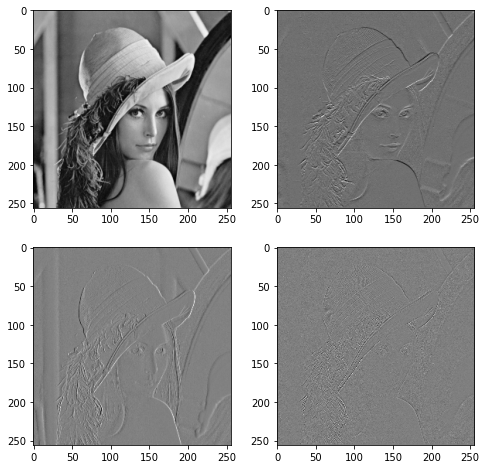

In [5]:
# print(img_col)
LL,LH,HL,HH=forward_wavelet_transform(img,row,col)
plt.figure(figsize=(8,8))
# plt.imshow(img_col,cmap='gray')
plt.subplot(2,2,1)
plt.imshow(LL,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(HL,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(LH,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(HH,cmap='gray')
plt.show()

Inverse Transform

$x[2n]=a[n]+\frac{1}{2}(d[n]+1)$

$x[2n+1]=x[2n]-d[n]$

In [6]:
def inverse_wavelet_transform(LL,LH,HL,HH):
    img_row=np.zeros((row,col),dtype='int32')
    img_col=np.zeros((row,col),dtype='int32')
    img_col[0:row//2,0:col//2]=LL.copy()
    img_col[0:row//2,col//2:col]=LH.copy()
    img_col[row//2:row,0:col//2]=HL.copy()
    img_col[row//2:row,col//2:col]=HH.copy()
    for i in range(col):
        for j in range(row//2):
            img_row[2*j][i]=img_col[j][i]+math.floor((img_col[j+row//2][i]+1)/2)
            img_row[2*j+1][i]=img_row[2*j][i]-img_col[j+row//2][i]
    for i in range(row):
        for j in range(col//2):
            img_col[i][2*j]=img_row[i][j]+math.floor((img_row[i][j+col//2]+1)/2)
            img_col[i][2*j+1]=img_col[i][2*j]-img_row[i][j+col//2]
    return img_col

Output image

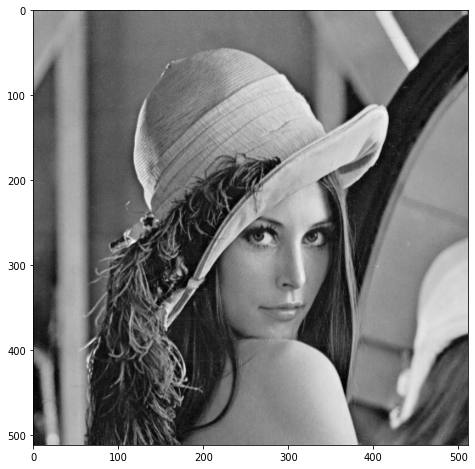

In [7]:
# print(img)
img_col=inverse_wavelet_transform(LL,LH,HL,HH)
plt.figure(figsize=(8,8))
plt.imshow(img_col,cmap='gray')
plt.show()

Q. Embed a watermark image of size 32x32 or 64x64 in HH component of cover image(512x512) using <b>1-bit or 2-bit LSB(Least Significant Bit) Substitution</b> method. Further recover the watermark from the stego image.

* Reading the watermark image

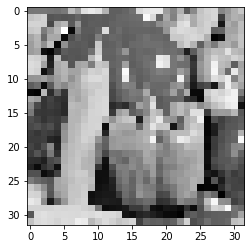

In [8]:
wtr_img=cv2.imread('peeper.tiff',0)
wtr_img=cv2.resize(wtr_img,(32,32))
plt.imshow(wtr_img,cmap='gray')
wrow,wcol=wtr_img.shape

* Function to convert decimal to 8 bit binary

In [9]:
def toBinary(j):
    temp=bin(j).replace('0b',"")
    temp2=temp[::-1]
    while len(temp2)<9:
        temp2+='0'
    temp=temp2[::-1]
    if(j<0):
        temp=temp.replace('-',"")
        temp[1:]
        temp="1"+temp
    return temp

* Function to convert binary to decimal

In [10]:
def toDecimal(j):
    if(j[0]=="1"):
        j=j[1:]
        return -int(j,2)
    else:
        j=j[1:]
        return int(j,2)

* Convert watermark image to bitstring

In [11]:
list_wtr_img=""
for i in wtr_img:
    for j in i:
        list_wtr_img+=toBinary(j)
print(list_wtr_img)
# print(32*32*9)

0011010110011011000011011000011010100011010000011011110101001110100011010110001100110011110110001110101000000010110000010110000010111010011010000110000000110010100110011110110011100100011010011110000100111100010101100011111000101011100101110010101111100011110010100010000100111010101100000101011010101100110101110100010011110010100110010011110010100100010111010010100100010101010010101110010101000010110000010111100010111110011000100011001000110110110110000010010111000100101100011101010101011100101110000100110010101100010101101110101111100001111000100011100100111100100110010101110110101111000101110000010001100100101100101001000010101000100001110010100010010101110010101100010101000010110110010111100010111010010111110011000000011001010011000100100000000100011000100100100110000010110010010100110000101011110101110100101100000000110100100110100100011000101010000101100010101101010011100000100010110101000110111000010000011110011100010010101000010101000010110110110000110010110100011000110010110100

* Embed the bitstring into the <b>HH</b> part of the image

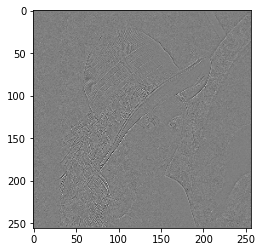

In [12]:
count=0
rowh,colh=HH.shape
nHH=HH.copy()
for i in range(rowh):
    for j in range(colh):
        if(count<wrow*wcol*9):
            binary_8bit=toBinary(HH[i,j])
            binary_8bit=binary_8bit[:-1]
            binary_8bit+=list_wtr_img[count]
            # print(binary_8bit)
            count+=1
            # print(int(binary_8bit,2))
            nHH[i,j]=toDecimal(binary_8bit)
plt.imshow(nHH,cmap='gray')
# print(nHH)

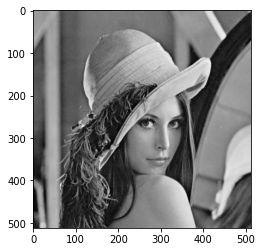

In [13]:
stego_img=inverse_wavelet_transform(LL,LH,HL,nHH)
plt.imshow(stego_img,cmap='gray')

In [14]:
# a=-255
# b=toBinary(a)
# print(b)
# c=toDecimal(b)
# print(c)


Decoding from stego image

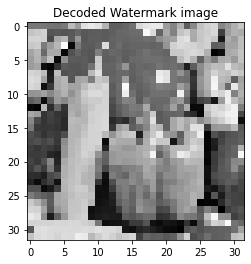

In [15]:
srow,scol=stego_img.shape
sll,slh,shl,shh=forward_wavelet_transform(stego_img,srow,scol)
count=0
decode="" #decoded bit string
for i in range(rowh):
    for j in range(colh):
        if(count<wrow*wcol*9):
            temp=toBinary(shh[i,j])
            decode+=temp[-1]
            count+=1

generated_wtr=np.zeros((wrow,wcol),dtype='uint8')
count=0
for i in range(wrow):
    for j in range(wcol):
        temp=decode[count:count+9]
        count+=9
        generated_wtr[i,j]=toDecimal(temp)
plt.title("Decoded Watermark image")
plt.imshow(generated_wtr,cmap='gray')